<a href="https://colab.research.google.com/github/Saurabh224/Practhon-IISc/blob/main/PRACTATHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from IPython.display import clear_output 
from scipy import spatial
import skimage.io as io
from sklearn.preprocessing import StandardScaler
from random import uniform
# % matplotlib inline

In [ ]:
embed_list = []
pkl_path = '/content/drive/MyDrive/mobilenetfinal.pkl'
with open(pkl_path, 'rb') as f:
    embd_list = pickle.load(f)

scaler = StandardScaler()
scaler.fit(embd_list)
embd_list = scaler.fit_transform(embd_list)

In [ ]:
embd_list.mean(axis = 0)
print(embd_list.std(axis = 0))

[0.9999978  0.99999946 1.0000013  ... 0.9999981  0.9999981  0.99999946]


In [ ]:
root = '/content/drive/MyDrive/16k_images/'
img_list = os.listdir(root)

new_matrix = [[i, embd_list[i], 0] for i in range(len(img_list))]
print(len(img_list))

16032


In [ ]:
class Prac:
    def __init__(self, root, matrix, alpha=0.85, theta=0.8):
        self.alpha = alpha # learning parameter
        self.root = root
        self.matrix = matrix
        self.theta = theta # exploration parameter
        self.white_img = np.zeros((1 , 60))

    # maybe slow
    def updatehistory(self, liked):
        avgdist = np.zeros(len(self.matrix))
        for j in liked:
            avgdist += self.cossim(j)
        avgdist /= len(liked)
        for i in range(len(self.matrix)):
            self.matrix[i][2] = self.alpha * self.matrix[i][2] + (1 - self.alpha) * avgdist[i]

    def cossim(self, x):
        x = np.array([1-spatial.distance.cosine(x, i[1]) for i in self.matrix])
        return x

    def show4images(self):
        bestrows = []
        imgs = []

        for i in range(4):
            if uniform(0, 1) < self.theta: # explore
                self.theta *= 0.8
                rowdel = new_matrix.pop(np.random.randint(0, 1000))
            else: # exploit
                rowdel = new_matrix.pop()

            ind = rowdel[0]
            img = Image.open(root + img_list[ind])
            bestrows.append(rowdel)
            imgs.append(img)

        
        fig = plt.figure(figsize=(5, 7))
        rows = 2
        columns = 2
        fig.add_subplot(rows, columns, 1)
 
        # showing image
        plt.imshow(imgs[0])
        plt.axis('off')
        plt.title("1")
        
        # Adds a subplot at the 2nd position
        fig.add_subplot(rows, columns, 2)
        
        # showing image
        plt.imshow(imgs[1])
        plt.axis('off')
        plt.title("2")
        
        # Adds a subplot at the 3rd position
        fig.add_subplot(rows, columns, 3)
        
        # showing image
        plt.imshow(imgs[2])
        plt.axis('off')
        plt.title("3")
        
        # Adds a subplot at the 4th position
        fig.add_subplot(rows, columns, 4)
        
        # showing image
        plt.imshow(imgs[3])
        plt.axis('off')
        plt.title("4")

        plt.show()
        fig = plt.figure(figsize=(5, 7))
        # white_img = np.zeros((1 , 60))

        plt.imshow(self.white_img)
        plt.axis('off')
        
        plt.show()

        print('Enter image numbers you like')
        choice = input().strip().split(" ")
        liked = np.array([bestrows[int(i)-1][1] for i in choice])

        return liked

    def sortmatrix(self):
        self.matrix.sort(key=lambda x: x[2])


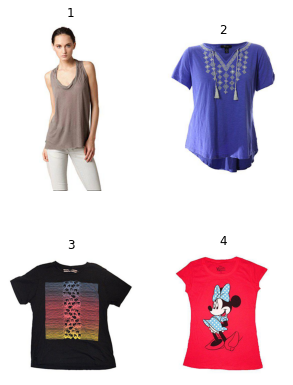

Enter image numbers you like
2 3


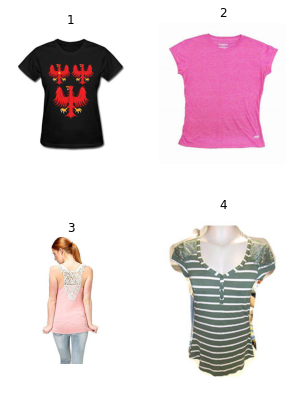

Enter image numbers you like
4


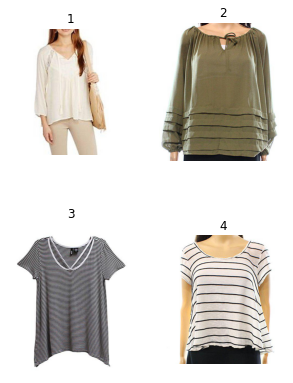

Enter image numbers you like
2


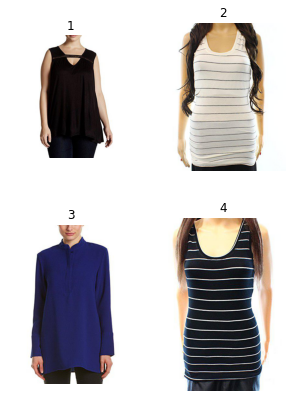

Enter image numbers you like
4


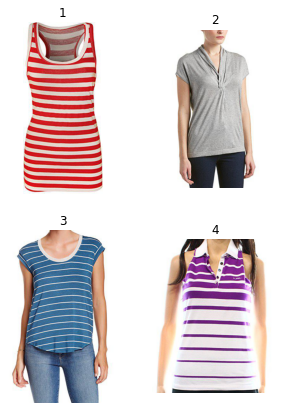

Enter image numbers you like


KeyboardInterrupt: ignored

In [ ]:
root = '/content/drive/MyDrive/16k_images/'
prac = Prac(root, new_matrix)

while True:
    liked = prac.show4images()
    # dist = prac.getdistvector(liked)
    prac.updatehistory(liked)
    prac.sortmatrix()


